### problem statement

#### Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) 
#### and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\08_PCA\wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [36]:
#importing required libraries.

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [38]:
df2=df.iloc[:,1:]

In [40]:
### normalizing the values

normal_df = scale(df2.values)

In [41]:
pca = PCA()
pca_values = pca.fit_transform(normal_df)

In [42]:
pca = PCA(n_components = .95)
pca_values = pca.fit_transform(normal_df)

In [43]:
#the amount of variance that each PCA explain is 

var = pca.explained_variance_ratio_


In [44]:
# cumulative variance

In [45]:
var1 = np.cumsum(np.round(var, decimals=4))*100

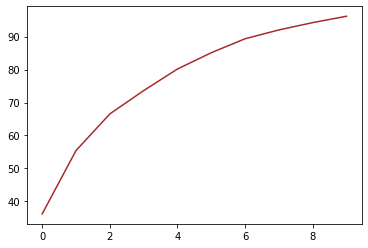

In [46]:
#variance plot for pca components 

plt.plot(var1, color='brown')


In [47]:
pca_df = pd.DataFrame(pca_values[:,:3], columns = ["PCA1", "PCA2", "PCA3"])

In [48]:
#importing libraries for clustering 

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

<function matplotlib.pyplot.show(*args, **kw)>

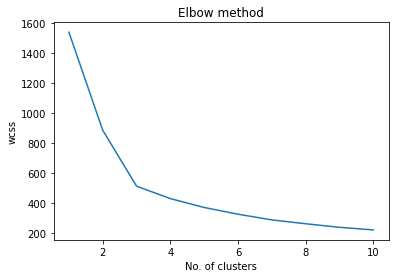

In [71]:
### finding optimum no. of clusters 

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i , random_state= 0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show

In [74]:
### as distance is getting narrow after 3 cluster we will be selecting optimum clusters as 3

In [83]:
## Kmeans clustering 

clusters_new = KMeans(3, random_state=40)
clusters_new.fit(pca_df)

KMeans(n_clusters=3, random_state=40)

In [84]:
df2['KMeans_cluster']=clusters_new.labels_

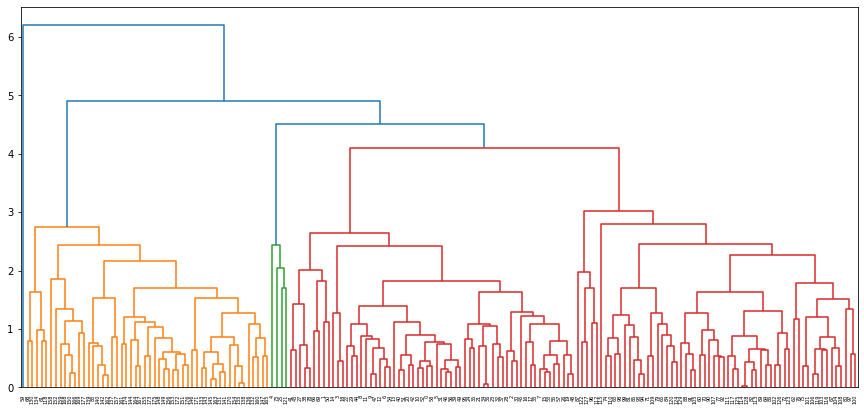

In [79]:
#hierarchical clustering


#creating dendrogram

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(pca_df, method='average'))


In [80]:


hc = AgglomerativeClustering(n_clusters=3 , affinity="euclidean", linkage="single")
y_hc = hc.fit_predict(pca_df)
clusters = pd.DataFrame(y_hc , columns=['H_clusters'])
df2['H_clusters'] = hc.labels_



In [85]:
df2.groupby(['KMeans_cluster']).count()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,H_clusters
KMeans_cluster,,,,,,,,,,,,,,
0,51,51,51,51,51,51,51,51,51,51,51,51,51,51
1,63,63,63,63,63,63,63,63,63,63,63,63,63,63
2,64,64,64,64,64,64,64,64,64,64,64,64,64,64


In [82]:
df2.groupby(['H_clusters']).count()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_cluster
H_clusters,,,,,,,,,,,,,,
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,174,174,174,174,174,174,174,174,174,174,174,174,174,174


In [86]:
df.groupby(['Type']).count()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59
2,71,71,71,71,71,71,71,71,71,71,71,71,71
3,48,48,48,48,48,48,48,48,48,48,48,48,48


In [87]:
### Conclusion 

#OPtimum clusters by elbow method is 3

#elbow menthod gives same no. of opitmum clusters as original data set has

#Hierarchial clusters group most of the data in one cluster only which is not usefull

#Kmeasn cluster relsults close to the cluter origianl data set has.



In [95]:
df2['Type']=df.iloc[:,0:1]

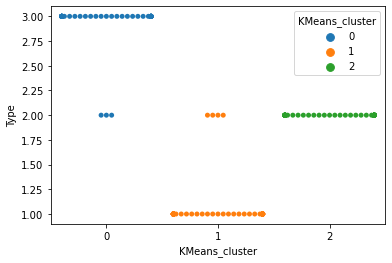

In [141]:

### comparison between Kmean cluster and original Type

sns.swarmplot(y= 'Type',x='KMeans_cluster', data=df2, hue='KMeans_cluster',)
